In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split


In [6]:
## Load iris dataset
iris = datasets.load_iris()
x = iris.data[:,0:2]    ## we are taking only 2 features inorder to simplify plotting in 2d only.
y = iris.target

In [7]:
## Train test split of data
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [8]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## SVC classifier Parameters 
* **C** is penalty parameter i.e.  $$C * (... ) + regularisation$$
    So, if C is high, it means overfitting.
    If C is low, it means under-fitting.

* **Gamma** is $1/(2\sigma^2)$.
    1. If $\sigma^2$ is too high means each point is two far away i.e. underfitting or, Gamma is too low
    2. If $\sigma^2$ is too less means each point is nearer i.e. overfitting or, Gamma is too high.
    
* **Kernel** Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be use.

* In SVM, The multiclass support is handled according to a one-vs-one scheme. It doesn't have option for one-vs-rest. (Note: decision function shape = ovr is something else.)

* **LinearSVC Classifier** uses one-vs-rest scheme with Linear Kernel

In [9]:
clf.score(x_test, y_test)

0.76315789473684215

In [15]:
def makegrid(x1, x2, h = 0.02):
    ##Calculating region where we would plot.
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    
    ## Making an array of all points between with separatin h
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    
    ## Replicates each point multiple times to make a mesh grid
    xx, yy = np.meshgrid(a, b)
    
    return xx, yy

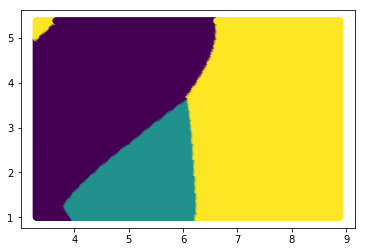

In [19]:
xx, yy = makegrid(x[:,0], x[:,1])

predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c= predictions)
plt.show()